In [20]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot

C:\Users\AACE~1\AppData\Local\Temp/ipykernel_10896/2382176086.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [7]:
series = read_csv('train.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
series.replace('?', 130000, inplace=True)
X = series.values.astype(int)
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]

C:\Users\AACE~1\AppData\Local\Temp/ipykernel_10896/2918073727.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('train.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)


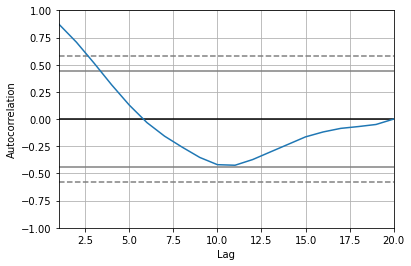

In [17]:
autocorrelation_plot(X[:20])
pyplot.show()

In [11]:
type(X[1])

numpy.int32

In [41]:
from tqdm import tqdm

history = [x for x in train]
predictions = list()

i=0
for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(8,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(yhat)
    print('predicted=%f, expected=%f' % (yhat, obs))
    if i==50:
        break
    else:
        i+=1

  0%|          | 1/11922 [00:03<12:08:35,  3.67s/it]

predicted=126688.875358, expected=155703.000000


  0%|          | 2/11922 [00:07<12:05:14,  3.65s/it]

predicted=147118.815376, expected=204320.000000


  0%|          | 3/11922 [00:10<11:53:58,  3.59s/it]

predicted=161127.518419, expected=216796.000000


  0%|          | 4/11922 [00:14<11:55:14,  3.60s/it]

predicted=167225.232926, expected=209333.000000


  0%|          | 5/11922 [00:18<11:58:03,  3.62s/it]

predicted=166956.212148, expected=201080.000000


  0%|          | 6/11922 [00:21<12:03:26,  3.64s/it]

predicted=161106.249957, expected=197168.000000


  0%|          | 7/11922 [00:25<12:03:20,  3.64s/it]

predicted=150702.898721, expected=195680.000000


  0%|          | 8/11922 [00:29<12:04:19,  3.65s/it]

predicted=138584.827129, expected=192492.000000


  0%|          | 9/11922 [00:32<12:03:16,  3.64s/it]

predicted=128751.343243, expected=189331.000000


  0%|          | 10/11922 [00:36<12:01:16,  3.63s/it]

predicted=123818.937367, expected=185174.000000


  0%|          | 11/11922 [00:39<12:00:54,  3.63s/it]

predicted=124089.890285, expected=187572.000000


  0%|          | 12/11922 [00:43<11:59:07,  3.62s/it]

predicted=128463.733321, expected=188899.000000


  0%|          | 13/11922 [00:47<11:57:48,  3.62s/it]

predicted=135360.597327, expected=198958.000000


  0%|          | 14/11922 [00:50<11:59:20,  3.62s/it]

predicted=142931.414916, expected=208037.000000


  0%|          | 15/11922 [00:54<11:58:57,  3.62s/it]

predicted=149193.964410, expected=212700.000000


  0%|          | 16/11922 [00:58<11:58:21,  3.62s/it]

predicted=152593.765607, expected=232202.000000


  0%|          | 17/11922 [01:01<11:56:55,  3.61s/it]

predicted=152590.625203, expected=228193.000000


  0%|          | 18/11922 [01:05<11:56:40,  3.61s/it]

predicted=149704.002398, expected=198120.000000


  0%|          | 19/11922 [01:08<12:00:06,  3.63s/it]

predicted=145103.701437, expected=159224.000000


  0%|          | 20/11922 [01:12<12:02:44,  3.64s/it]

predicted=140159.224130, expected=129274.000000


  0%|          | 21/11922 [01:16<12:07:10,  3.67s/it]

predicted=136128.690460, expected=114454.000000


  0%|          | 22/11922 [01:19<11:54:29,  3.60s/it]

predicted=133916.060488, expected=106839.000000


  0%|          | 23/11922 [01:23<11:55:47,  3.61s/it]

predicted=133868.331710, expected=104912.000000


  0%|          | 24/11922 [01:27<12:02:18,  3.64s/it]

predicted=135717.096959, expected=110921.000000


  0%|          | 25/11922 [01:30<12:01:37,  3.64s/it]

predicted=138727.662998, expected=156512.000000


  0%|          | 26/11922 [01:34<12:01:46,  3.64s/it]

predicted=141974.083218, expected=206183.000000


  0%|          | 27/11922 [01:38<12:03:39,  3.65s/it]

predicted=144607.900370, expected=217212.000000


  0%|          | 28/11922 [01:41<12:05:11,  3.66s/it]

predicted=146049.157060, expected=209096.000000


  0%|          | 29/11922 [01:45<12:04:48,  3.66s/it]

predicted=146088.452765, expected=200582.000000


  0%|          | 30/11922 [01:49<12:09:24,  3.68s/it]

predicted=144896.723973, expected=196484.000000


  0%|          | 31/11922 [01:52<12:08:30,  3.68s/it]

predicted=142939.054270, expected=193583.000000


  0%|          | 32/11922 [01:56<12:06:58,  3.67s/it]

predicted=140816.449246, expected=195046.000000


  0%|          | 33/11922 [02:00<12:07:53,  3.67s/it]

predicted=139090.325654, expected=157770.000000


  0%|          | 34/11922 [02:03<12:04:46,  3.66s/it]

predicted=138144.588328, expected=187467.000000


  0%|          | 35/11922 [02:07<12:02:27,  3.65s/it]

predicted=138114.637915, expected=186001.000000


  0%|          | 36/11922 [02:11<12:03:32,  3.65s/it]

predicted=138887.279518, expected=188484.000000


  0%|          | 37/11922 [02:14<12:04:35,  3.66s/it]

predicted=140161.008280, expected=197490.000000


  0%|          | 38/11922 [02:18<12:06:47,  3.67s/it]

predicted=141546.217556, expected=201612.000000


  0%|          | 39/11922 [02:22<12:16:19,  3.72s/it]

predicted=142676.181750, expected=204667.000000


  0%|          | 40/11922 [02:25<12:09:26,  3.68s/it]

predicted=143297.956688, expected=216005.000000


  0%|          | 41/11922 [02:29<12:05:22,  3.66s/it]

predicted=143321.451702, expected=204084.000000


  0%|          | 42/11922 [02:33<12:05:18,  3.66s/it]

predicted=142820.144765, expected=181702.000000


  0%|          | 43/11922 [02:36<12:06:57,  3.67s/it]

predicted=141990.610753, expected=150726.000000


  0%|          | 44/11922 [02:40<12:03:45,  3.66s/it]

predicted=141086.639684, expected=125385.000000


  0%|          | 45/11922 [02:44<12:02:09,  3.65s/it]

predicted=140347.459729, expected=113194.000000


  0%|          | 46/11922 [02:47<12:01:18,  3.64s/it]

predicted=139938.852037, expected=103015.000000


  0%|          | 47/11922 [02:51<12:01:57,  3.65s/it]

predicted=139920.674012, expected=101209.000000


  0%|          | 48/11922 [02:55<12:08:04,  3.68s/it]

predicted=140245.741920, expected=104132.000000


  0%|          | 49/11922 [02:58<12:08:48,  3.68s/it]

predicted=140786.088241, expected=123109.000000


  0%|          | 50/11922 [03:02<12:07:44,  3.68s/it]

predicted=141376.141144, expected=154213.000000


  0%|          | 50/11922 [03:06<12:16:54,  3.72s/it]

predicted=141859.649739, expected=180310.000000


In [42]:
len(predictions)

51

Test MSE: 2391179353.829


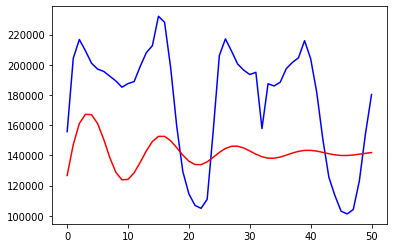

In [43]:
test1 = test[:51]
error = mean_squared_error(test1, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test1, color='blue')
pyplot.plot(predictions, color='red')
pyplot.show()